# 1. Określenie problemu i przeanalizowanie go w szerszej perspektywie.


## Do dalszych prac trafia plik z wartosciami odzywczymi. 

## Po jego ogladnieciu wnioskuje, ze problem do zmodelowania to col. rating bo do kalorii model jest znany

# 2. Pozyskanie danych. 

In [12]:
import pandas as pd
from datetime import datetime

path = str('dane_projekt/epi_r.csv')
df = pd.read_csv(path)

df.head(5)
df = df.drop(['title'], axis=1)

# odrzucam kolumne title


# 3. Analiza danych w celu wykrycia dodatkowych informacji.

# Ogladam sobie


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 679 entries, rating to turkey
dtypes: float64(679)
memory usage: 103.9 MB


In [14]:
df.dtypes

rating        float64
calories      float64
protein       float64
fat           float64
sodium        float64
               ...   
cookbooks     float64
leftovers     float64
snack         float64
snack week    float64
turkey        float64
Length: 679, dtype: object

In [15]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.00,15935.00,15890.00,15869.00,15933.00,20052.00,20052.00,20052.00,20052.00,20052.00,...,20052.00,20052.00,20052.00,20052.00,20052.00,20052.00,20052.00,20052.00,20052.00,20052.00
mean,3.71,6322.96,100.16,346.88,6225.97,0.00,0.00,0.00,0.00,0.00,...,0.00,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.02
std,1.34,359046.04,3840.32,20456.11,333318.19,0.02,0.01,0.03,0.04,0.02,...,0.04,0.16,0.01,0.02,0.12,0.01,0.02,0.04,0.03,0.15
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.75,198.00,3.00,7.00,80.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,4.38,331.00,8.00,17.00,294.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,4.38,586.00,27.00,33.00,711.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,5.00,30111218.00,236489.00,1722763.00,27675110.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


# wyglada na to, ze wiekszosc kolumn to wartosci 0 lub 1

In [16]:
cols = df.columns
print(cols)

Index(['rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       '30 days of groceries',
       ...
       'yellow squash', 'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks',
       'leftovers', 'snack', 'snack week', 'turkey'],
      dtype='object', length=679)


In [17]:
for i in cols[5:]:
    print(i, df[i].unique())


#cakeweek [0. 1.]
#wasteless [0. 1.]
22-minute meals [0. 1.]
3-ingredient recipes [0. 1.]
30 days of groceries [0. 1.]
advance prep required [0. 1.]
alabama [0. 1.]
alaska [0. 1.]
alcoholic [0. 1.]
almond [0. 1.]
amaretto [0. 1.]
anchovy [0. 1.]
anise [0. 1.]
anniversary [0. 1.]
anthony bourdain [0. 1.]
aperitif [0. 1.]
appetizer [0. 1.]
apple [1. 0.]
apple juice [0. 1.]
apricot [0. 1.]
arizona [0. 1.]
artichoke [0. 1.]
arugula [0. 1.]
asian pear [0. 1.]
asparagus [0. 1.]
aspen [0. 1.]
atlanta [0. 1.]
australia [0. 1.]
avocado [0. 1.]
back to school [0. 1.]
backyard bbq [0. 1.]
bacon [0. 1.]
bake [0. 1.]
banana [0. 1.]
barley [0. 1.]
basil [0. 1.]
bass [0. 1.]
bastille day [0. 1.]
bean [1. 0.]
beef [0. 1.]
beef rib [0. 1.]
beef shank [0. 1.]
beef tenderloin [0. 1.]
beer [0. 1.]
beet [0. 1.]
bell pepper [0. 1.]
berry [0. 1.]
beverly hills [0. 1.]
birthday [0. 1.]
biscuit [0. 1.]
bitters [0. 1.]
blackberry [0. 1.]
blender [0. 1.]
blue cheese [0. 1.]
blueberry [0. 1.]
boil [0. 1.]
bok cho

suzanne goin [0. 1.]
sweet potato/yam [0. 1.]
swiss cheese [0. 1.]
switzerland [0. 1.]
swordfish [0. 1.]
taco [0. 1.]
tailgating [0. 1.]
tamarind [0. 1.]
tangerine [0. 1.]
tapioca [0. 1.]
tarragon [0. 1.]
tart [0. 1.]
tea [0. 1.]
tennessee [0. 1.]
tequila [0. 1.]
tested & improved [0. 1.]
texas [0. 1.]
thanksgiving [0. 1.]
thyme [0. 1.]
tilapia [0. 1.]
tofu [0. 1.]
tomatillo [0. 1.]
tomato [1. 0.]
tortillas [0. 1.]
tree nut [0. 1.]
tree nut free [0. 1.]
triple sec [0. 1.]
tropical fruit [0. 1.]
trout [0. 1.]
tuna [0. 1.]
turnip [0. 1.]
utah [0. 1.]
valentine's day [0. 1.]
vanilla [0. 1.]
veal [0. 1.]
vegan [0. 1.]
vegetable [1. 0.]
vegetarian [0. 1.]
venison [0. 1.]
vermont [0. 1.]
vermouth [0. 1.]
vinegar [0. 1.]
virginia [0. 1.]
vodka [0. 1.]
waffle [0. 1.]
walnut [0. 1.]
wasabi [0. 1.]
washington [0. 1.]
washington, d.c. [0. 1.]
watercress [0. 1.]
watermelon [0. 1.]
wedding [0. 1.]
weelicious [0. 1.]
west virginia [0. 1.]
westwood [0. 1.]
wheat/gluten-free [0. 1.]
whiskey [0. 1.]
wh

array([[<AxesSubplot: title={'center': 'snack'}>]], dtype=object)

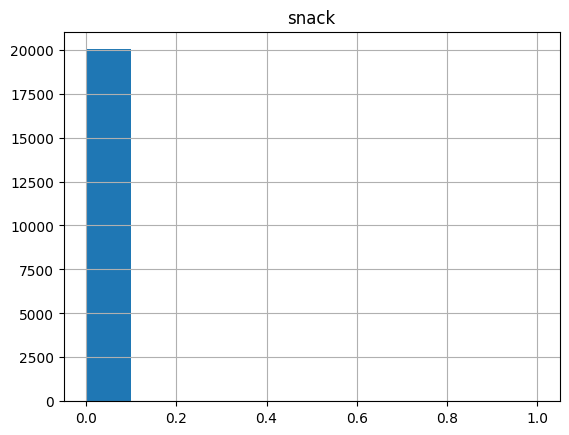

In [18]:
df.hist(['snack'])

# 3. Analiza danych w celu wykrycia dodatkowych informacji.

## Ponizszy bardzo dlugo sie liczy, zaniechalem

In [19]:
# from pandas_profiling import ProfileReport

# profile = ProfileReport(df,
#                          title="Projektpraktyczny",
#                          html={'style': {'full_width': True}},
#                          sort=None)
#                         # Save to file
# profile.to_file('regresja_projektpraktyczny.html')


# 4. Przygotowanie danych w sposób uwidaczniający wzorce wykorzystywane przez algorytmy uczenia maszynowego.

## Usuwam wartosci zerowe

## opcja drop
## opcja mean
## opcja - nie kuma co ona robi

In [20]:
df.isna().sum()

rating           0
calories      4117
protein       4162
fat           4183
sodium        4119
              ... 
cookbooks        0
leftovers        0
snack            0
snack week       0
turkey           0
Length: 679, dtype: int64

In [21]:
# https://www.kaggle.com/code/alexisbcook/missing-values

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

df_target = df.rating
df_predictors = df.drop(['rating'], axis=1)

# For the sake of keeping the example simple, we'll use only numeric predictors.
df_numeric_predictors = df_predictors.select_dtypes(exclude=['object'])

print(df_numeric_predictors)

X_train, X_test, y_train, y_test = train_test_split(df_numeric_predictors,
                                                    df_target,
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=0)

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)


# # delete columns with missing value
cols_with_missing = [col for col in X_train.columns
                                 if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test  = X_test.drop(cols_with_missing, axis=1)
print("Mean Absolute Error from dropping columns with Missing Values:")
print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

# replace missing value with mean value in column with missing value
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer()
imputed_X_train = my_imputer.fit_transform(X_train)   #first fit_transform,second transform，
imputed_X_test = my_imputer.transform(X_test)
print("Mean Absolute Error from Imputation:")
print(score_dataset(imputed_X_train, imputed_X_test, y_train, y_test))


# przez dodanie kolumny tożsamości z brakującymi wartościami, ale w tym przykładzie nie działa to zbyt dobrze
imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

cols_with_missing = (col for col in X_train.columns
                                 if X_train[col].isnull().any())
for col in cols_with_missing:
    imputed_X_train_plus[col + '_was_missing'] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col + '_was_missing'] = imputed_X_test_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.transform(imputed_X_test_plus)

print("Mean Absolute Error from Imputation while Track What Was Imputed:")
print(score_dataset(imputed_X_train_plus, imputed_X_test_plus, y_train, y_test))

       calories  protein   fat  sodium  #cakeweek  #wasteless  \
0        426.00    30.00  7.00  559.00       0.00        0.00   
1        403.00    18.00 23.00 1439.00       0.00        0.00   
2        165.00     6.00  7.00  165.00       0.00        0.00   
3           NaN      NaN   NaN     NaN       0.00        0.00   
4        547.00    20.00 32.00  452.00       0.00        0.00   
...         ...      ...   ...     ...        ...         ...   
20047     28.00     2.00  2.00   64.00       0.00        0.00   
20048    671.00    22.00 28.00  583.00       0.00        0.00   
20049    563.00    31.00 38.00  652.00       0.00        0.00   
20050    631.00    45.00 24.00  517.00       0.00        0.00   
20051    560.00    73.00 10.00 3698.00       0.00        0.00   

       22-minute meals  3-ingredient recipes  30 days of groceries  \
0                 0.00                  0.00                  0.00   
1                 0.00                  0.00                  0.00   
2        

# najmniejszy blad daje dropna, co niniejszym czynie


In [22]:
df = df.dropna()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,2.50,426.00,30.00,7.00,559.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
1,4.38,403.00,18.00,23.00,1439.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3.75,165.00,6.00,7.00,165.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,3.12,547.00,20.00,32.00,452.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,4.38,948.00,19.00,79.00,1042.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20047,3.12,28.00,2.00,2.00,64.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
20048,4.38,671.00,22.00,28.00,583.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
20049,4.38,563.00,31.00,38.00,652.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
20050,4.38,631.00,45.00,24.00,517.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# bardzo dlugo liczy sie ten plik.
# czy nie ma sposobu, zeby wylosowac probke?

# Prawdopodobnie tu powinno nastapic odrzucenie wartosci skrajnych, ale przypomnialem sobie o tym przed odpaleniem ponizszego

In [ ]:
# https://medium.com/@fareedkhandev/apply-40-machine-learning-models-in-two-lines-of-code-c01dad24ad99

import lazypredict

from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
multiple_ML_model = LazyRegressor(verbose=0, ignore_warnings=True,predictions=True)
models,predictions = multiple_ML_model.fit(X_train, X_test, y_train, y_test)

 24%|██████████████████████████████████████████████▏                                                                                                                                                   | 10/42 [03:54<22:32, 42.27s/it]